In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
from datetime import datetime
import seaborn as sns

data_file = pd.read_csv('flight_data.csv', float_precision='round_trip') # reading csv file
data_file.dropna(inplace=True) # dropping NA values and actual dta is modified
data_file.head() # printing first 5 lines in data frames

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [2]:
data_file.tail()  # printing last 5 lines in data frames

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2013 23:00


In [ ]:
plt.rcParams['figure.figsize'] = (80,40)
sns.barplot(x='dest', y='month', hue='origin', data=data_file)
plt.ylabel('month')
plt.xlabel('destination airport')
# we can see that number of flights per month from one point to another

In [4]:
# creating a table by grouping data in 2 level basis, first based on origin and second on destination
table1 = pd.pivot_table(data_file, values='distance', index=['origin','dest'], columns=['month'])
table1.fillna(0, inplace=True)  # filling NA values with zeros
table1.head()

month            1       2       3       4       5       6       7       8   \
origin dest                                                                   
EWR    ALB    143.0   143.0   143.0   143.0   143.0   143.0   143.0   143.0   
       ANC      0.0     0.0     0.0     0.0     0.0     0.0  3370.0  3370.0   
       ATL    746.0   746.0   746.0   746.0   746.0   746.0   746.0   746.0   
       AUS   1504.0  1504.0  1504.0  1504.0  1504.0  1504.0  1504.0  1504.0   
       AVL    583.0     0.0     0.0     0.0   583.0   583.0   583.0   583.0   

month            9       10      11      12  
origin dest                                  
EWR    ALB    143.0   143.0   143.0   143.0  
       ANC      0.0     0.0     0.0     0.0  
       ATL    746.0   746.0   746.0   746.0  
       AUS   1504.0  1504.0  1504.0  1504.0  
       AVL    583.0   583.0   583.0   583.0

In [5]:
# creating a new column dep_in% by calculating percentage of dep_delay variable by sched_dep_time variable 
# to know delay percentage of flight
table2 = data_file
table2['dep_in'] = table2['dep_delay']/data_file['sched_dep_time']
table2['dep_in%'] = table2['dep_delay']*100/data_file['sched_dep_time']

In [6]:
# a new data frame obtained by grouping based on origin variable and finding minimum
best_air = table2.groupby('origin').min()
# best origin airport is obtained interms of departure time
print(best_air[best_air['dep_in%'] == best_air['dep_in%'].min()].index.values + ' is best airport interms of depature time')

['EWR is best airport interms of depature time']


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


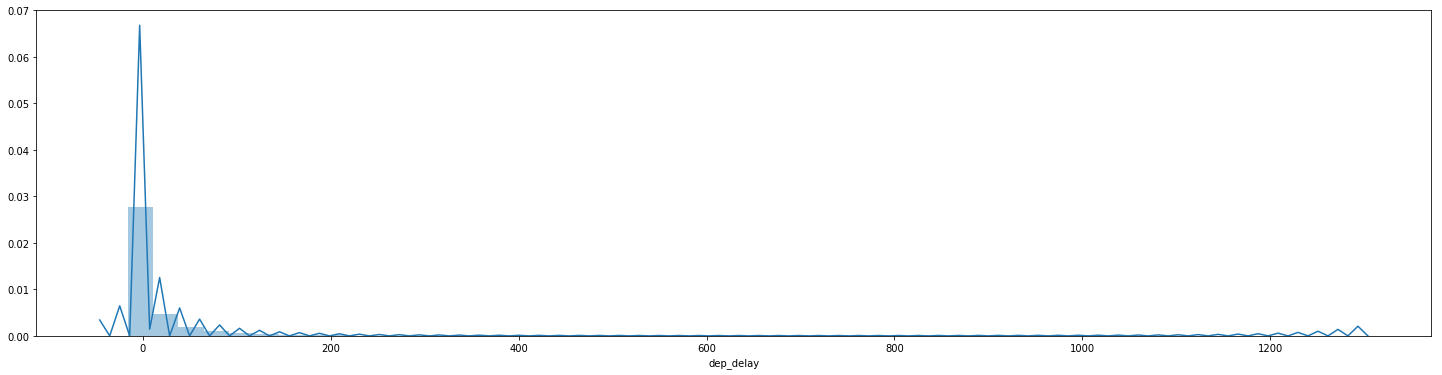

In [7]:
plt.rcParams['figure.figsize'] = (25,6)
sns.distplot(a=table2['dep_delay'], hist=True)
# flights depart mostly around 10mins early or late to the scheduled time

In [8]:
# new column speed is created by calculating speed of airplane using distance and time taken to travel
table3 = data_file
table3['speed'] = table3['distance']/(table3['arr_time'] - table3['dep_time'])
table3.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,dep_in,dep_in%,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,0.003883,0.388350,4.472843
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,0.007561,0.756144,4.466877
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,0.003704,0.370370,2.858268
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,-0.001835,-0.183486,3.426087
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,-0.010000,-1.000000,2.953488


In [9]:
#table3[table3.pivot_table(values='speed', index=['flight']) == table3.pivot_table(values='speed', index=['flight']).max()].index.values

# obtaining charactersitics of column speed taking flight column as index
print('Aircraft speed analysis')
table3.pivot_table(values='speed', index=['flight']).describe()

Aircraft speed analysis


,speed
count,3835.000000
mean,3.975821
std,1.816686
min,-1.179174
25%,2.578212
50%,3.545560
75%,5.168108
max,15.127660


C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


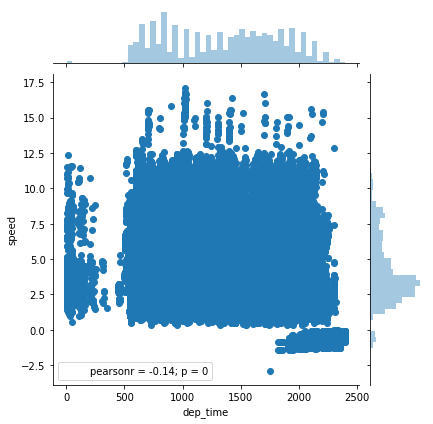

In [10]:
sns.jointplot(x='dep_time', y='speed', data=table3)
# speed of the flight is on an average between 0 to 12.5miles/hr whatever maybe the departure time

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


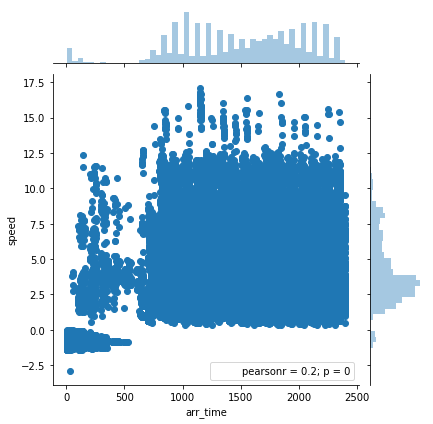

In [11]:
sns.jointplot(x='arr_time', y='speed', data=table3)
# speed of the flight is on an average between 0 to 12.5miles/hr whatever maybe the arrival time

In [12]:
# trying to find how many flights are on time and percentage of it among all flights
counter = 0
for i in data_file['arr_delay']:
    if i == 0:
        counter += 1

on_time = (counter/data_file.arr_delay.count())*100
print('the percentage of flights arriving on time is {}%'.format(round(on_time,2)))

the percentage of flights arriving on time is 1.65%


In [13]:
# data frame is created containing total number of flights going to a particular destination
print('the total number of flights headed to a destination')
no_flight=data_file.pivot_table(values='flight', index=['dest'], aggfunc='count')

the total number of flights headed to a destination


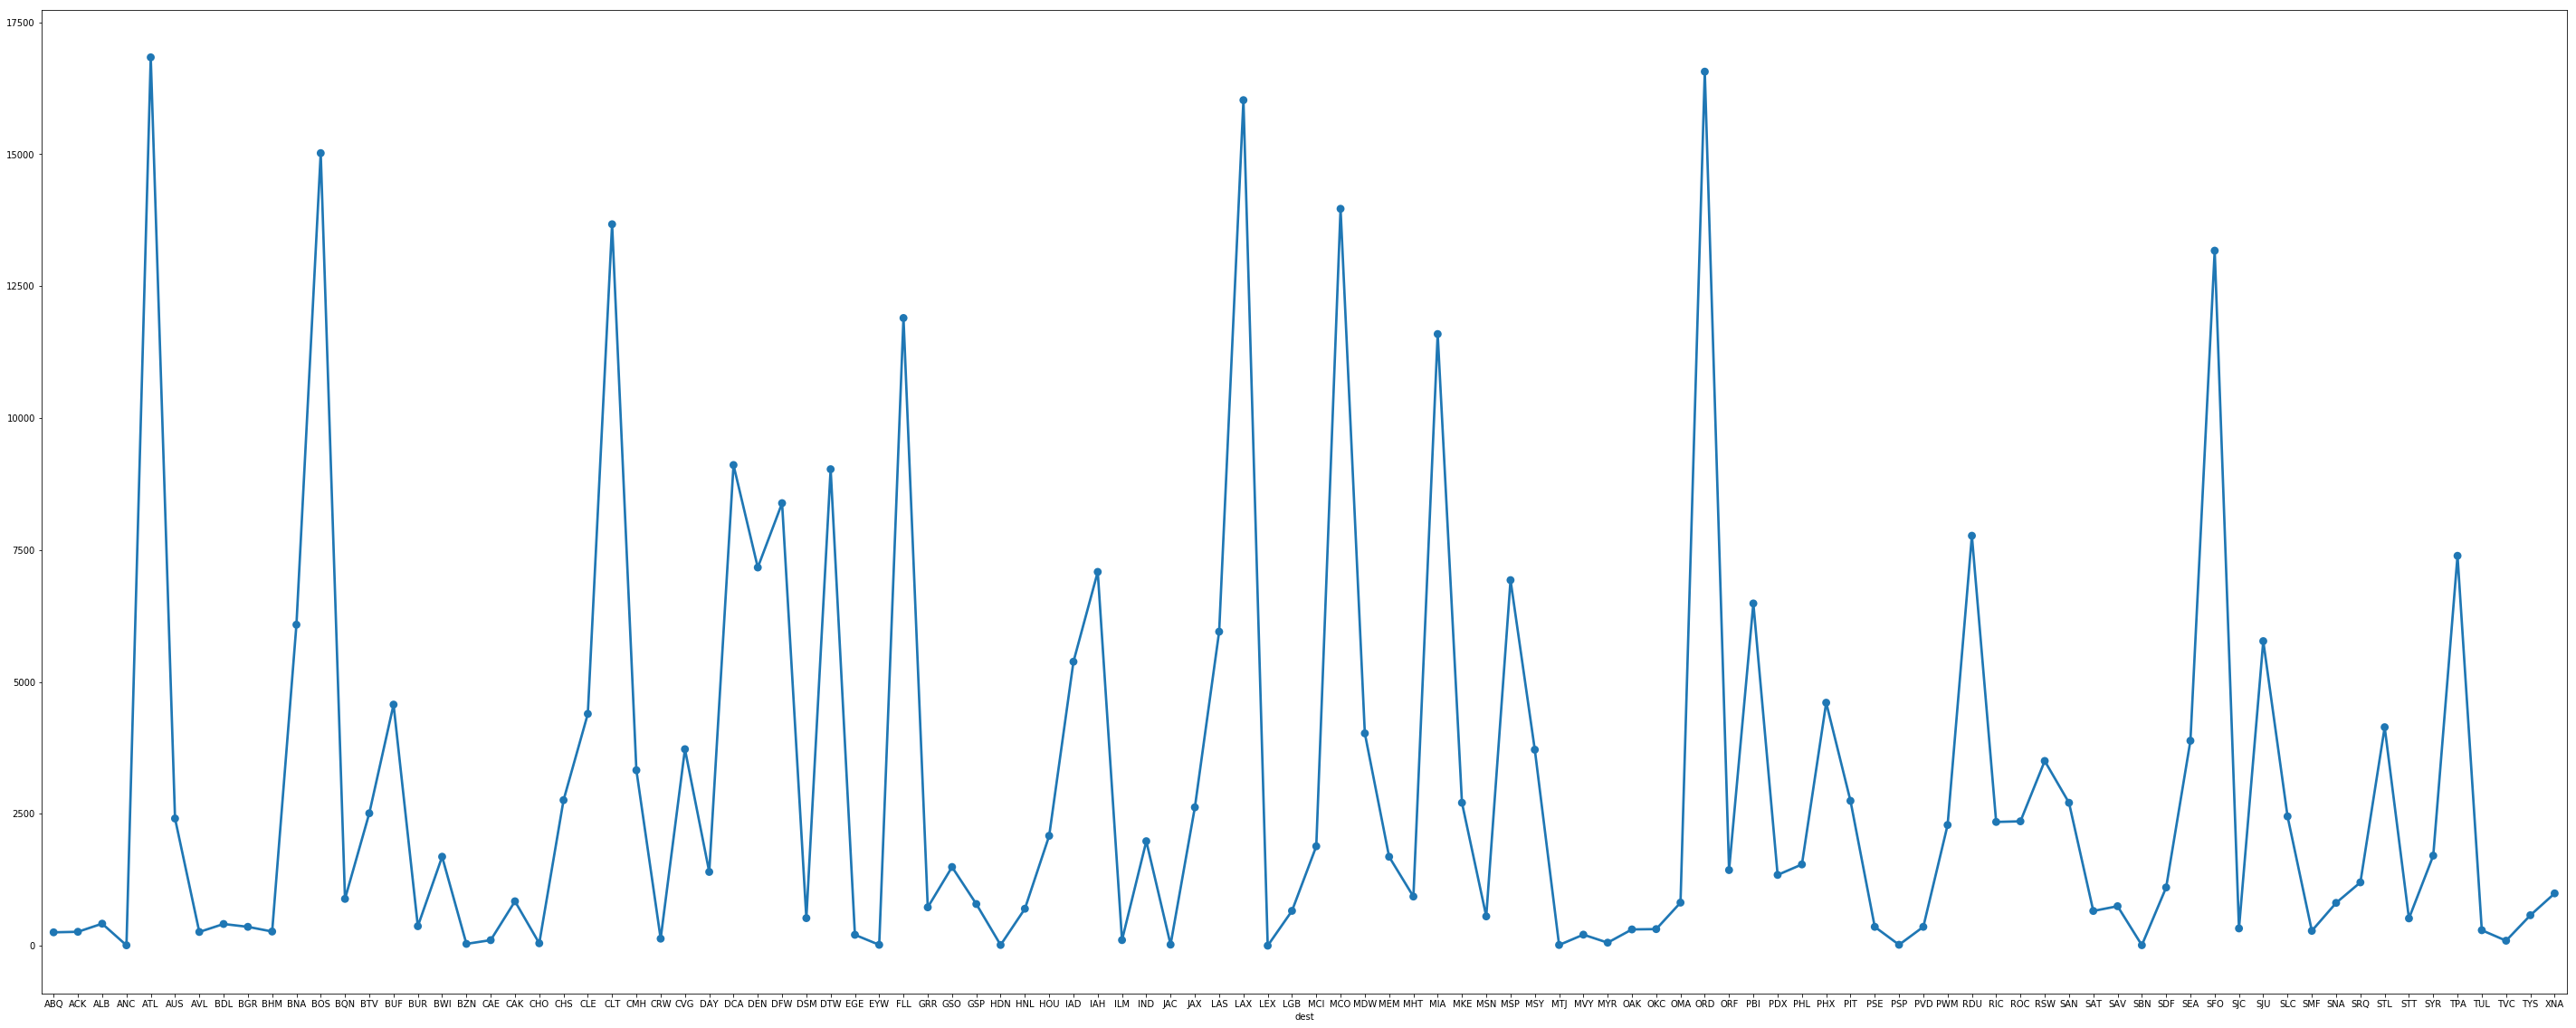

In [14]:
plt.rcParams['figure.figsize'] = (50,20)
sns.pointplot(data=no_flight.T)
# total number of flights going to a ATL destination is higher